#**Smart Factory Energy Prediction Challenge**

#**EDA (Exploratory Data Analysis)**



---



In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import warnings
warnings.filterwarnings('ignore')

#**Loading the Data Set**

In [3]:
# Reading the CSV file named 'data (1).csv' from the specified path into a DataFrame
df = pd.read_csv('/content/data (1).csv')

# Displaying the first 5 rows of the DataFrame to get an overview of the dataset
df.head()

,timestamp,equipment_energy_consumption,lighting_energy,zone1_temperature,zone1_humidity,zone2_temperature,zone2_humidity,zone3_temperature,zone3_humidity,zone4_temperature,...,zone9_temperature,zone9_humidity,outdoor_temperature,atmospheric_pressure,outdoor_humidity,wind_speed,visibility_index,dew_point,random_variable1,random_variable2
0,2016-01-11 17:00:00,60.0,-77.78778596503064,33.74660933896648,47.59666666666671,19.2,44.790000,19.79,NaN,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.300000,13.275433,13.275433
1,2016-01-11 17:10:00,60.0,30.0,19.89,46.69333333333329,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.200000,18.606195,18.606195
2,2016-01-11 17:20:00,50.0,30.0,19.89,46.3,19.2,44.626667,19.79,44.933333,35.921144,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.100000,28.642668,28.642668
3,2016-01-11 17:30:00,50.0,40.0,33.74660933896648,46.0666666666667,19.2,44.590000,19.79,45.000000,NaN,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,37.673716,45.410389,45.410389
4,2016-01-11 17:40:00,60.0,40.0,19.89,46.33333333333329,19.2,44.530000,19.79,45.000000,18.890000,...,4.476511,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.900000,10.084097,10.084097


#  Dataset Information Summary

In [4]:
df.info()# Displaying concise summary of the DataFrame including
# the number of non-null entries, column names, data types, and memory usage

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16857 entries, 0 to 16856
Data columns (total 29 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   timestamp                     16857 non-null  object 
 1   equipment_energy_consumption  16013 non-null  object 
 2   lighting_energy               16048 non-null  object 
 3   zone1_temperature             15990 non-null  object 
 4   zone1_humidity                16056 non-null  object 
 5   zone2_temperature             16004 non-null  object 
 6   zone2_humidity                15990 non-null  float64
 7   zone3_temperature             16055 non-null  float64
 8   zone3_humidity                15979 non-null  float64
 9   zone4_temperature             16041 non-null  float64
 10  zone4_humidity                16076 non-null  float64
 11  zone5_temperature             16019 non-null  float64
 12  zone5_humidity                16056 non-null  float64
 13  z

# Descriptive Statistics of the Dataset

In [5]:
df.describe() # Includes count, mean, standard deviation, min, max, and quartile values


,zone2_humidity,zone3_temperature,zone3_humidity,zone4_temperature,zone4_humidity,zone5_temperature,zone5_humidity,zone6_temperature,zone6_humidity,zone7_temperature,...,zone9_temperature,zone9_humidity,outdoor_temperature,atmospheric_pressure,outdoor_humidity,wind_speed,visibility_index,dew_point,random_variable1,random_variable2
count,15990.000000,16055.000000,15979.000000,16041.000000,16076.000000,16019.000000,16056.000000,16009.000000,16010.000000,16063.000000,...,16084.000000,15969.000000,16051.000000,16015.000000,16058.000000,16029.000000,16042.000000,16031.000000,16031.000000,16033.000000
mean,39.494553,21.665733,38.201314,20.239922,37.945608,19.052613,50.289131,6.469934,59.162913,19.672472,...,18.851085,40.318199,6.218582,755.757602,78.977595,4.195988,38.457150,2.783507,24.854981,25.093780
std,10.129513,2.594309,10.144388,2.783050,10.769813,2.346158,18.722516,8.867993,52.657787,2.879815,...,2.528783,11.168678,7.554684,13.643585,28.565660,4.409729,21.318655,6.094732,26.214960,25.523631
min,-77.265503,6.543921,-71.406273,4.613485,-81.446225,5.921094,-141.640143,-42.987365,-353.393026,3.578021,...,4.476511,-81.582494,-37.524768,678.159940,-221.668765,-20.929527,-82.329792,-32.098095,-120.170177,-120.409590
25%,37.757500,20.533333,36.592500,19.266667,35.200000,18.061111,45.290000,2.930000,37.066667,18.500000,...,17.890000,38.230000,3.000000,750.800000,71.000000,2.000000,29.000000,0.450000,12.179924,12.193789
50%,40.293333,21.767500,38.400000,20.290000,38.090000,19.050000,48.854429,6.263333,62.766667,19.600000,...,18.890000,40.363333,6.000000,756.200000,84.166667,4.000000,40.000000,2.750000,24.866978,24.834261
75%,43.000000,22.760000,41.433333,21.356667,41.560833,20.100000,53.918333,9.690000,86.590000,21.000000,...,20.200000,43.790000,9.250000,762.100000,91.988095,6.000000,40.000000,5.308333,37.950236,37.971764
max,77.265503,36.823982,71.406273,35.921144,81.446225,32.157594,141.640143,55.932271,353.393026,35.712952,...,33.238012,81.582494,49.853906,833.392675,221.668765,29.318719,159.606156,37.673716,170.156325,170.329617


# Checking for Missing Values in the Dataset


In [6]:
df.isnull().sum() # Checking the total number of missing (null) values in each column of the DataFrame


,0
timestamp,0
equipment_energy_consumption,844
lighting_energy,809
zone1_temperature,867
zone1_humidity,801
zone2_temperature,853
zone2_humidity,867
zone3_temperature,802
zone3_humidity,878
zone4_temperature,816


# Visualizing Distribution of the Target Variable: `equipment_energy_consumption`


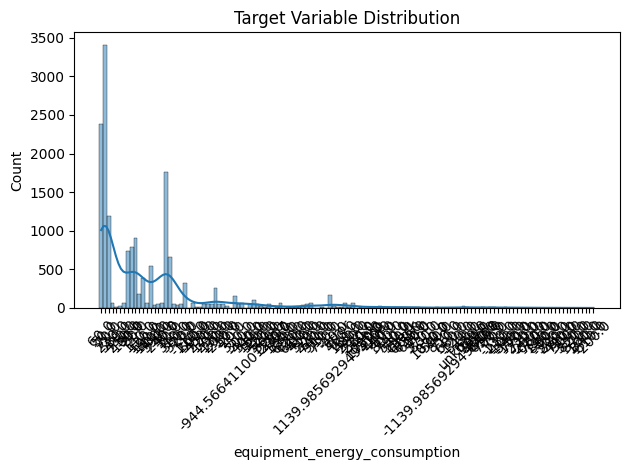

In [7]:
# Importing required libraries for data visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Plotting the distribution of the 'equipment_energy_consumption' column
# kde=True adds the Kernel Density Estimate curve
# bins=50 sets the number of bins for the histogram
sns.histplot(df['equipment_energy_consumption'], kde=True, bins=50)

# Adding title and labels for better readability
plt.title('Target Variable Distribution')
plt.xlabel('equipment_energy_consumption')

# Rotating x-axis labels for better visibility
plt.xticks(rotation=45)

# Adjusting layout to prevent clipping of labels
plt.tight_layout()

# Displaying the plot
plt.show()

# Converting Object Columns to Numeric (Excluding Timestamp)

In [8]:
# Identifying all columns with object (string) data type
object_cols = df.select_dtypes(include='object').columns
print("Object columns:", object_cols)

# Attempting to convert each object column (except 'timestamp') to numeric
# If conversion fails for a value, it will be set as NaN (errors='coerce')
for col in object_cols:
    if col != 'timestamp':
        df[col] = pd.to_numeric(df[col], errors='coerce')

# Checking the data types again for the original object columns
df[object_cols].dtypes

Object columns: Index(['timestamp', 'equipment_energy_consumption', 'lighting_energy',
       'zone1_temperature', 'zone1_humidity', 'zone2_temperature'],
      dtype='object')


,0
timestamp,object
equipment_energy_consumption,float64
lighting_energy,float64
zone1_temperature,float64
zone1_humidity,float64
zone2_temperature,float64


# Visualizing Missing Values Across Features

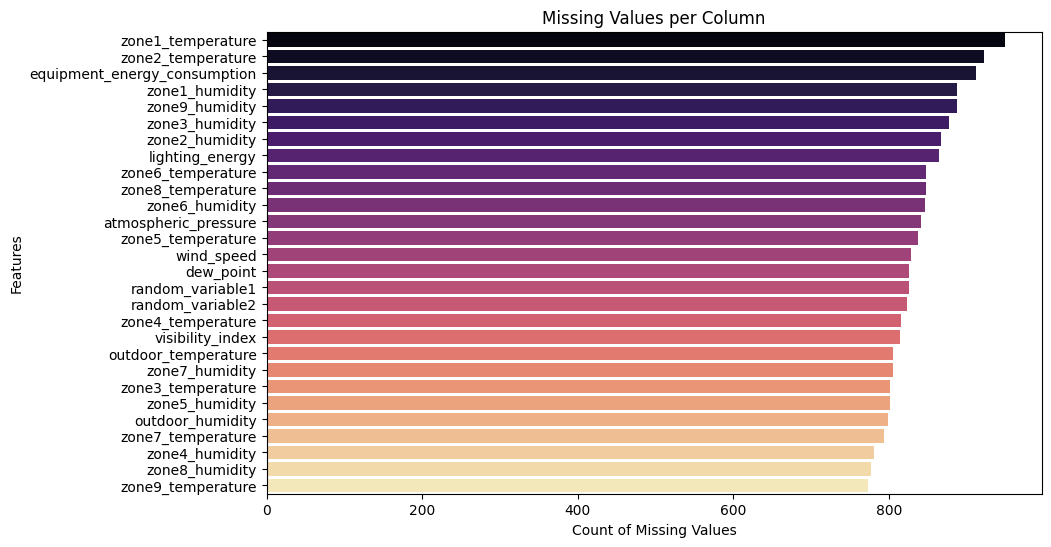

In [9]:
# Calculating the total number of missing values per column
missing = df.isnull().sum()

# Filtering only the columns that have missing values and sorting them in descending order
missing = missing[missing > 0].sort_values(ascending=False)

# Plotting the missing value counts using a horizontal bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=missing.values, y=missing.index, palette='magma')

# Adding plot title and axis labels
plt.title("Missing Values per Column")
plt.xlabel("Count of Missing Values")
plt.ylabel("Features")

# Displaying the plot
plt.show()

# Descriptive Statistics Sorted by Standard Deviation


In [10]:
df.describe().T.sort_values(by='std', ascending=False)
# Generating descriptive statistics for numerical columns and transposing the result
# Sorting the statistics by standard deviation (std) in descending orderStatistics Sorted by Standard Deviation


,count,mean,std,min,25%,50%,75%,max
equipment_energy_consumption,15945.0,95.810413,182.753554,-1139.985693,50.000000,60.000000,100.000000,1139.985693
zone6_humidity,16010.0,59.162913,52.657787,-353.393026,37.066667,62.766667,86.590000,353.393026
outdoor_humidity,16058.0,78.977595,28.565660,-221.668765,71.000000,84.166667,91.988095,221.668765
random_variable1,16031.0,24.854981,26.214960,-120.170177,12.179924,24.866978,37.950236,170.156325
random_variable2,16033.0,25.093780,25.523631,-120.409590,12.193789,24.834261,37.971764,170.329617
visibility_index,16042.0,38.457150,21.318655,-82.329792,29.000000,40.000000,40.000000,159.606156
zone5_humidity,16056.0,50.289131,18.722516,-141.640143,45.290000,48.854429,53.918333,141.640143
lighting_energy,15993.0,3.938101,14.580575,-86.002966,0.000000,0.000000,0.000000,86.002966
atmospheric_pressure,16015.0,755.757602,13.643585,678.159940,750.800000,756.200000,762.100000,833.392675
zone8_humidity,16080.0,41.853532,12.301530,-94.385668,38.626667,42.040455,46.003889,94.385668


# Outlier Detection for Important Columns


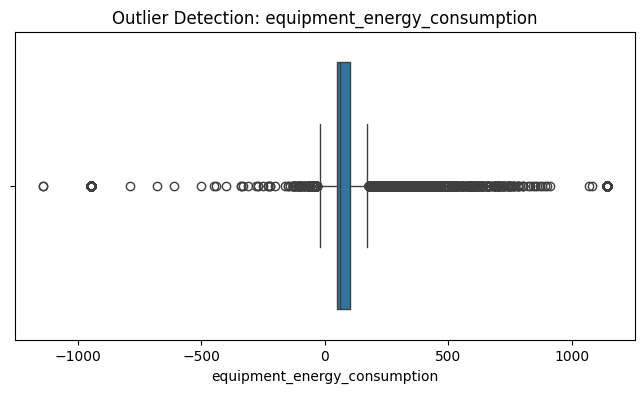

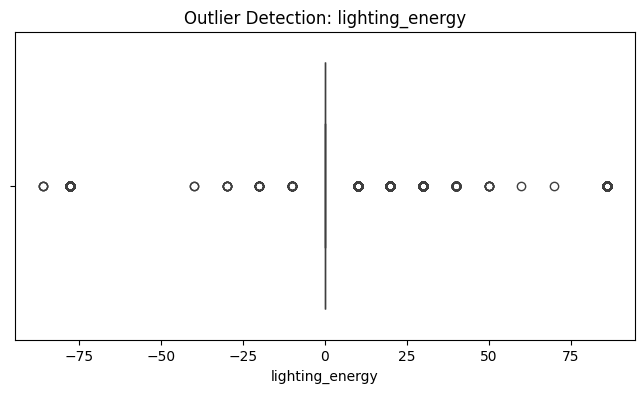

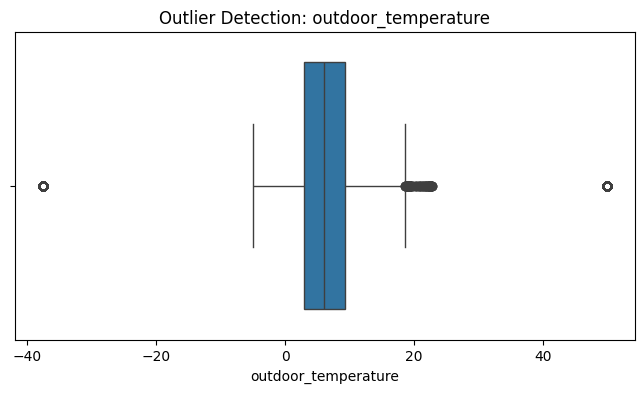

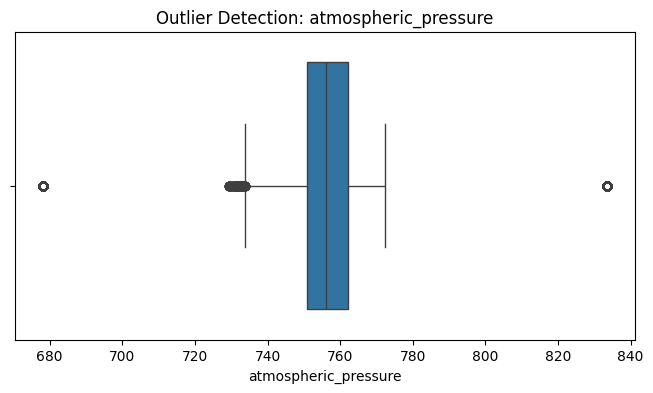

In [11]:
# Defining a list of important columns to check for outliers
important_cols = ['equipment_energy_consumption', 'lighting_energy', 'outdoor_temperature', 'atmospheric_pressure']

# Looping through the list of important columns to create boxplots
for col in important_cols:
    plt.figure(figsize=(8, 4))  # Setting figure size
    sns.boxplot(x=df[col])  # Creating a boxplot for each column
    plt.title(f"Outlier Detection: {col}")  # Adding title for each plot
    plt.show()  # Displaying the plot

#Feature Selection and Feature Engineering
##Correlation Matrix and Heatmap

---




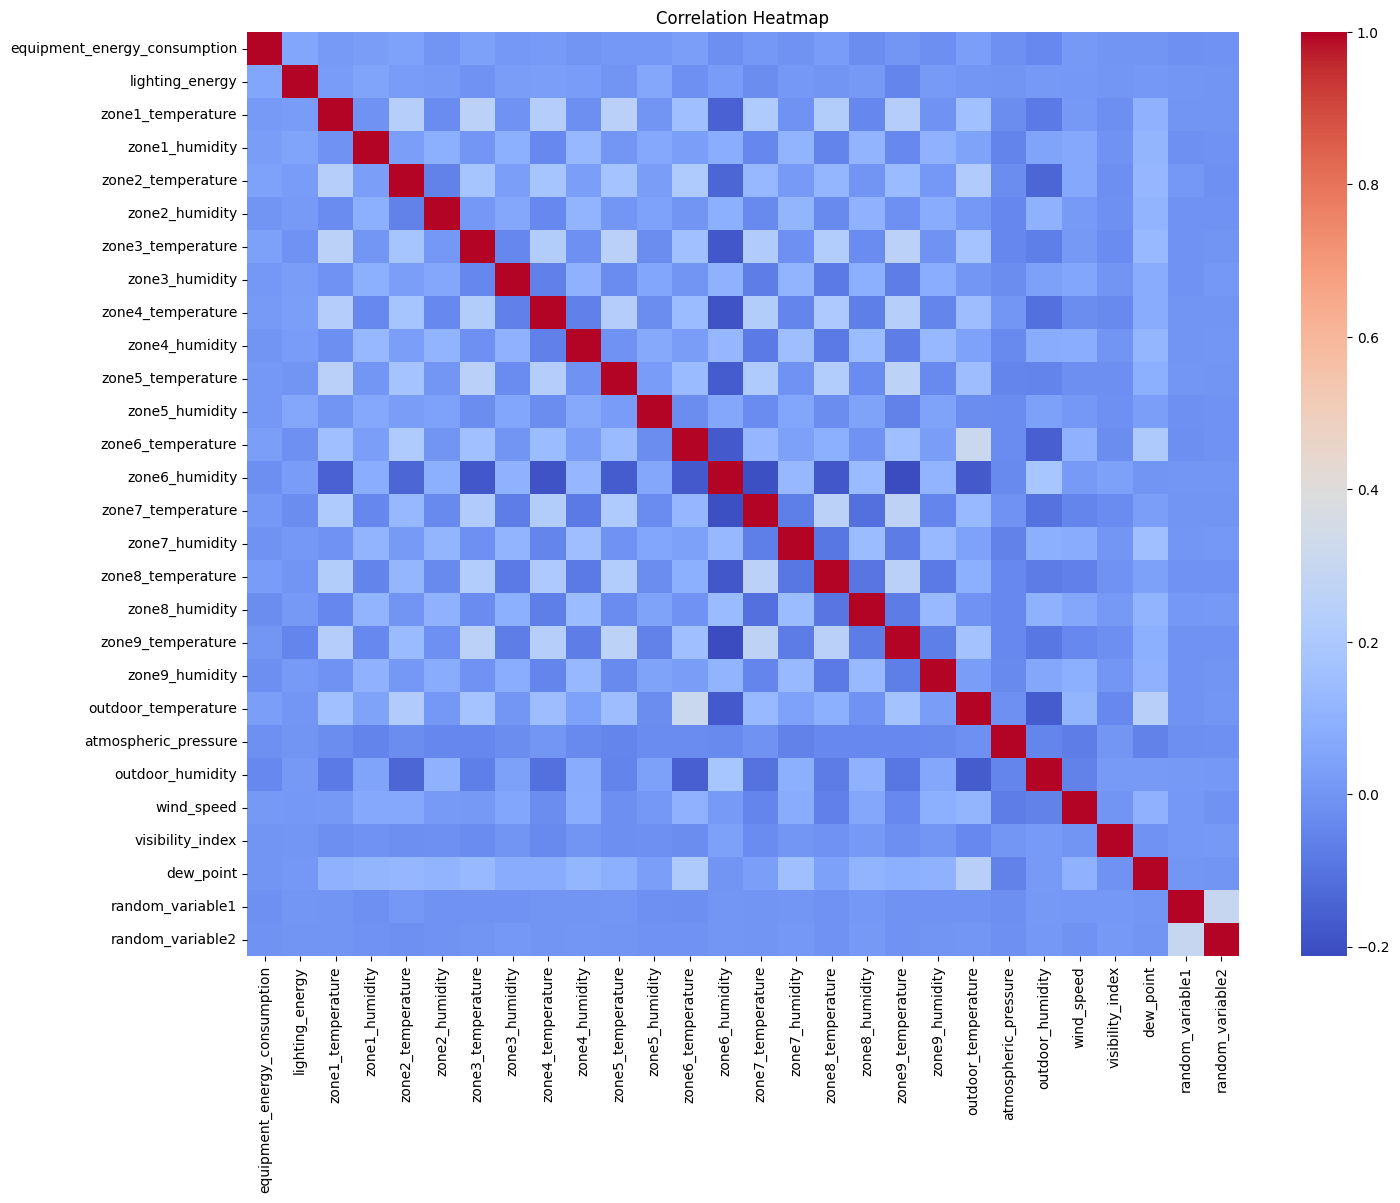

In [12]:
# Select only numeric columns
numeric_df = df.select_dtypes(include='number')

# Compute correlation matrix
corr_matrix = numeric_df.corr()

# Plot heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=False, fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()

# Correlation of Features with `equipment_energy_consumption`


In [13]:
# Extracting the correlations of all features with the 'equipment_energy_consumption' column
# Sorting them in descending order to see the strongest correlations
target_corr = corr_matrix['equipment_energy_consumption'].sort_values(ascending=False)

# Displaying the sorted correlation values
print(target_corr)

equipment_energy_consumption    1.000000
lighting_energy                 0.057007
zone2_temperature               0.042058
zone3_temperature               0.038033
outdoor_temperature             0.033223
zone6_temperature               0.032136
zone1_humidity                  0.026997
zone8_temperature               0.019716
zone1_temperature               0.018402
zone4_temperature               0.017128
wind_speed                      0.011566
zone5_temperature               0.008938
zone5_humidity                  0.007903
zone7_temperature               0.007255
zone3_humidity                  0.006724
zone9_temperature               0.003985
visibility_index                0.000022
zone4_humidity                 -0.003232
dew_point                      -0.003299
zone2_humidity                 -0.003984
zone7_humidity                 -0.006884
random_variable2               -0.011387
atmospheric_pressure           -0.014060
random_variable1               -0.016155
zone6_humidity  

# Distribution of `equipment_energy_consumption`


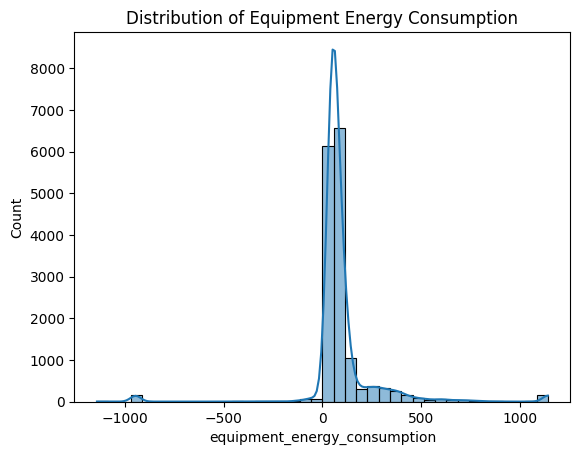

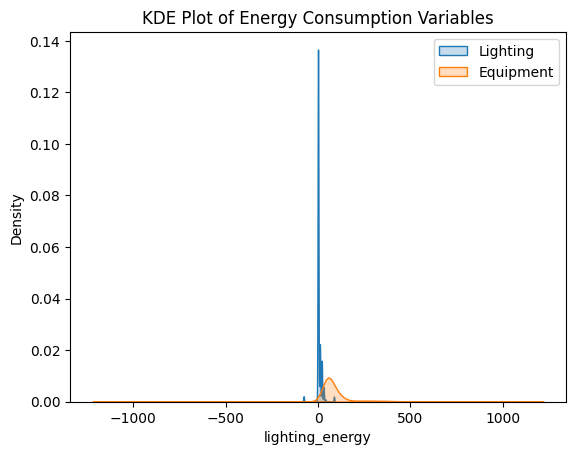

In [14]:
# Plotting the histogram for 'equipment_energy_consumption' with a Kernel Density Estimate (KDE) curve
# Using 40 bins to visualize the distribution more clearly
sns.histplot(df['equipment_energy_consumption'], kde=True, bins=40)

# Adding a title to the plot for better context
plt.title("Distribution of Equipment Energy Consumption")

# Displaying the plot
plt.show()

# Plotting Kernel Density Estimates (KDEs) for both 'lighting_energy' and 'equipment_energy_consumption'
# This allows us to visually compare their distribution patterns
sns.kdeplot(df['lighting_energy'], label='Lighting', fill=True)
sns.kdeplot(df['equipment_energy_consumption'], label='Equipment', fill=True)

# Adding a title and a legend to make the plot clearer
plt.title("KDE Plot of Energy Consumption Variables")
plt.legend()

# Displaying the KDE plot
plt.show()


# Extracting Time-Based Features and Visualizing Energy Consumption by Hour


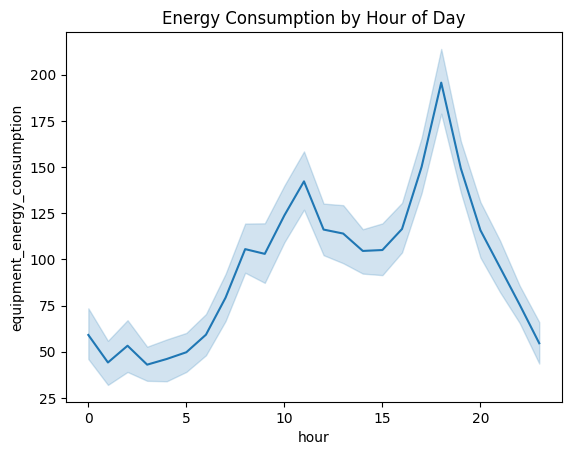

In [15]:
# Converting the 'timestamp' column to datetime format for easier time-based extraction
df['timestamp'] = pd.to_datetime(df['timestamp'])

# Extracting hour, day of the week, and month from the 'timestamp' column
df['hour'] = df['timestamp'].dt.hour  # Extracts hour (0-23)
df['dayofweek'] = df['timestamp'].dt.dayofweek  # Extracts day of the week (0=Monday, 6=Sunday)
df['month'] = df['timestamp'].dt.month  # Extracts month (1-12)

# Plotting the energy consumption by the hour of the day
sns.lineplot(x='hour', y='equipment_energy_consumption', data=df)

# Adding title to the plot
plt.title("Energy Consumption by Hour of Day")

# Displaying the plot
plt.show()

# Creating Lag Features and Rolling Mean for Temporal Patterns


In [16]:
# Creating lag features to capture temporal patterns in energy consumption
# 'energy_lag_1' is the previous time step's value (lag of 1)
df['energy_lag_1'] = df['equipment_energy_consumption'].shift(1)

# 'energy_lag_3' is the value from three time steps ago (lag of 3)
df['energy_lag_3'] = df['equipment_energy_consumption'].shift(3)

# 'energy_roll_mean_3h' is the 3-period rolling mean of 'equipment_energy_consumption'
df['energy_roll_mean_3h'] = df['equipment_energy_consumption'].rolling(3).mean()

# Visualizing Average Zone Temperatures and Humidity


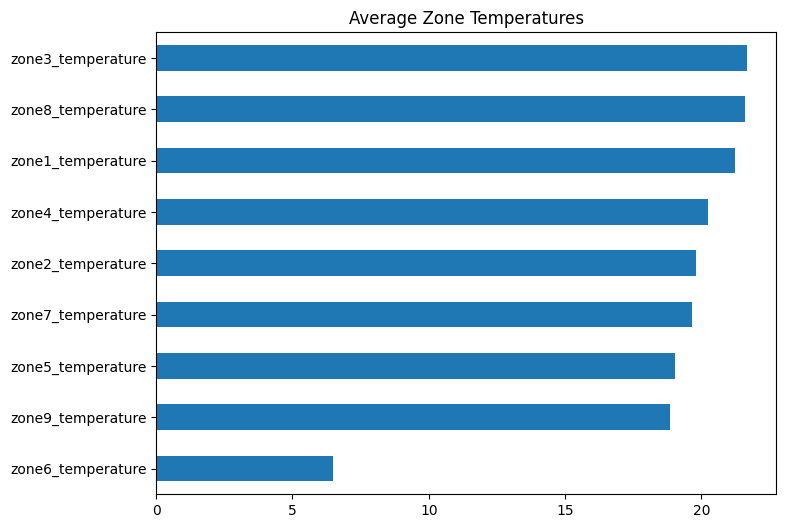

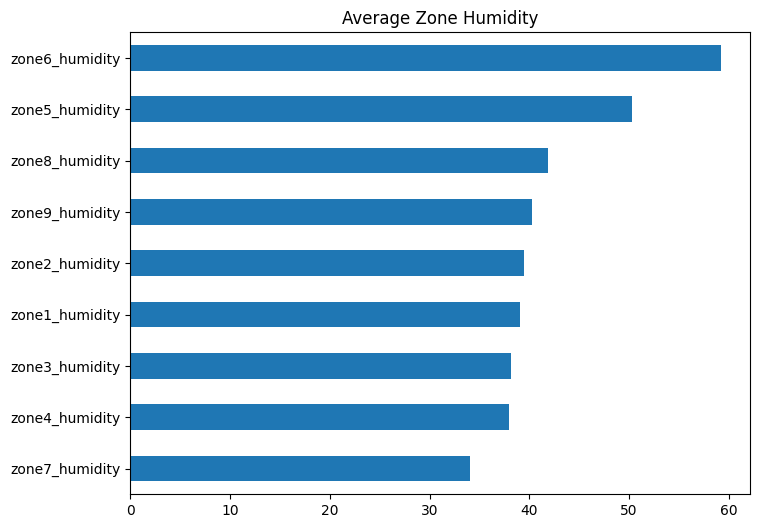

In [17]:
# Identifying columns related to zone temperatures and zone humidity
zone_temps = [col for col in df.columns if 'zone' in col and 'temperature' in col]
zone_humidity = [col for col in df.columns if 'zone' in col and 'humidity' in col]

# Plotting the average zone temperatures
# Calculating the mean of each zone temperature column and sorting the results
df[zone_temps].mean().sort_values().plot(kind='barh', figsize=(8,6), title='Average Zone Temperatures')

# Displaying the plot
plt.show()

# Plotting the average zone humidity
# Calculating the mean of each zone humidity column and sorting the results
df[zone_humidity].mean().sort_values().plot(kind='barh', figsize=(8,6), title='Average Zone Humidity')

# Displaying the plot
plt.show()

# Scatterplots and Correlations for Random Variables


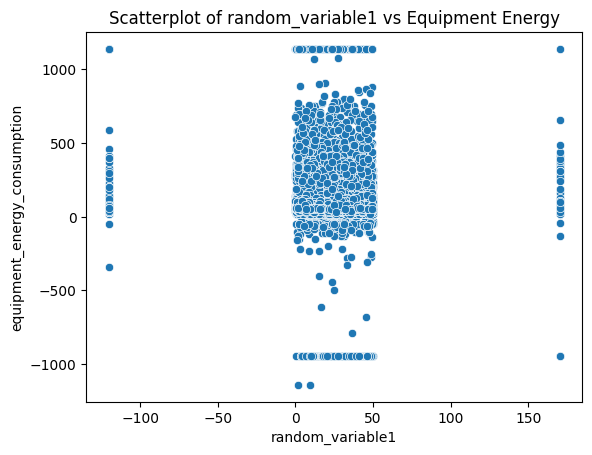

Correlation with target: -0.01615519898815763


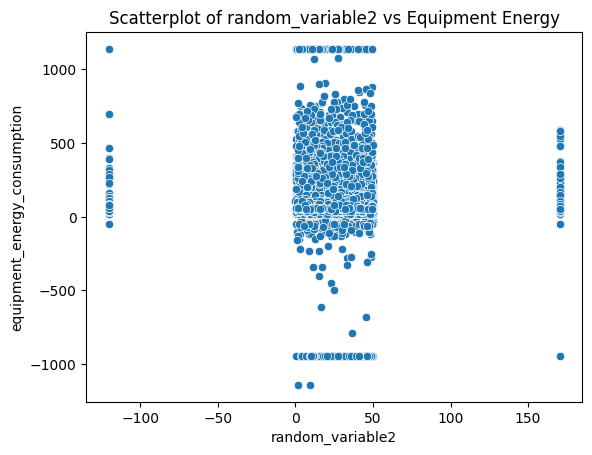

Correlation with target: -0.011387127326762442


In [18]:
# Looping through a list of random variables to create scatterplots and compute their correlation with 'equipment_energy_consumption'
for var in ['random_variable1', 'random_variable2']:
    # Creating scatterplot for each variable against 'equipment_energy_consumption'
    sns.scatterplot(x=var, y='equipment_energy_consumption', data=df)
    plt.title(f"Scatterplot of {var} vs Equipment Energy")
    plt.show()

    # Printing the correlation between the current variable and 'equipment_energy_consumption'
    print(f"Correlation with target: {df[var].corr(df['equipment_energy_consumption'])}")


# Ensuring All Numeric Fields Are of Float Type


In [19]:
# Dropping the 'timestamp' column from the list of columns to focus on numeric columns
numeric_cols = df.columns.drop('timestamp')

# Looping through each numeric column and converting it to float
for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Handling Missing Values in the Dataset


In [20]:
# Dropping rows where the target variable ('equipment_energy_consumption') has missing values
df = df.dropna(subset=['equipment_energy_consumption'])

# Filling remaining missing values in the dataset with the median of each column
df.fillna(df.median(), inplace=True)

# Confirming that no missing values are left in the dataset
assert df.isnull().sum().sum() == 0

# Extracting Time-Based Features from the Timestamp

In [21]:
# Converting the 'timestamp' column to datetime format
df['timestamp'] = pd.to_datetime(df['timestamp'])

# Extracting the hour from the timestamp and creating a new 'hour' column
df['hour'] = df['timestamp'].dt.hour

# Extracting the day of the week (0=Monday, 6=Sunday) and creating a new 'dayofweek' column
df['dayofweek'] = df['timestamp'].dt.dayofweek

# Extracting the month from the timestamp and creating a new 'month' column
df['month'] = df['timestamp'].dt.month

# Optionally dropping the 'timestamp' column as it's no longer needed
df.drop(columns='timestamp', inplace=True)

# Capping Outliers in the Dataset


In [22]:
# Function to cap outliers using the Interquartile Range (IQR) method
def cap_outliers(series):
    # Calculate the first and third quartiles (Q1 and Q3)
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)

    # Calculate the Interquartile Range (IQR)
    IQR = Q3 - Q1

    # Calculate the lower and upper bounds for outliers
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    # Cap the outliers by setting values outside the bounds to the respective limits
    return series.clip(lower, upper)

# Apply the outlier capping function to all numerical columns with type 'float64'

# Standardizing Features for Machine Learning


In [23]:
from sklearn.preprocessing import StandardScaler

# Exclude target column to focus on features
features = df.drop(columns='equipment_energy_consumption')

# Separate the target variable
target = df['equipment_energy_consumption']

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the features, scaling them to have zero mean and unit variance
scaled_features = scaler.fit_transform(features)

# Rebuild the DataFrame with the scaled features
X = pd.DataFrame(scaled_features, columns=features.columns)

# Reset the index of the target variable to align with the features
y = target.reset_index(drop=True)

# Feature Importance using RandomForestRegressor


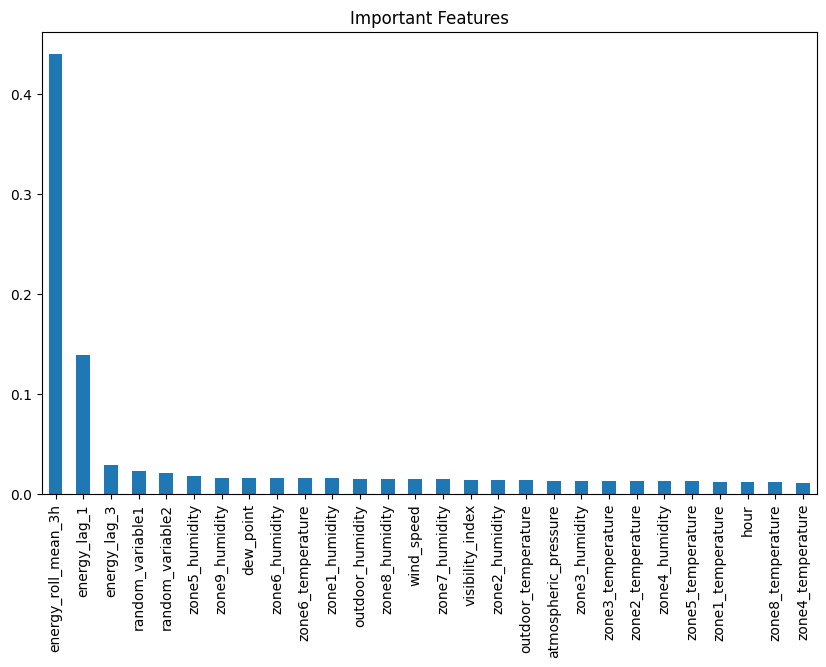

In [24]:
from sklearn.ensemble import RandomForestRegressor

# Initialize the RandomForestRegressor model
rf = RandomForestRegressor(random_state=42)

# Fit the model to the data
rf.fit(X, y)

# Extract the feature importances from the model
importances = pd.Series(rf.feature_importances_, index=X.columns)

# Filter and sort features that have importance greater than 0.01
important_features = importances[importances > 0.01].sort_values(ascending=False)

# Plot the important features
plt.figure(figsize=(10,6))
important_features.plot(kind='bar')
plt.title("Important Features")
plt.show()

# Keep only the important features in the dataset
X = X[important_features.index]

# Splitting Data into Training and Test Sets


In [25]:
from sklearn.model_selection import train_test_split

# Split the data into training and test sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Print the shape of the training and test sets to verify the split
print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)

Train shape: (12756, 28)
Test shape: (3189, 28)


# Reusing Unscaled Features for Tree Models


In [26]:
# Reuse the important features for tree models (without scaling)
X_tree = features[important_features.index]
y_tree = target

# Split the data into training and test sets for tree models (80% training, 20% testing)
X_train_tree, X_test_tree, y_train_tree, y_test_tree = train_test_split(
    X_tree, y_tree, test_size=0.2, random_state=42
)

# Training and Evaluating an XGBoost Model


In [27]:
# Evaluation function to calculate RMSE, MAE, and R²
def evaluate(y_true, y_pred, label='Model'):
    print(f"--- {label} ---")
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))  # Root Mean Squared Error
    mae = mean_absolute_error(y_true, y_pred)  # Mean Absolute Error
    r2 = r2_score(y_true, y_pred)  # R-squared (Coefficient of Determination)
    print("RMSE:", rmse)
    print("MAE:", mae)
    print("R²:", r2)

In [28]:
from xgboost import XGBRegressor

# Initialize and train the XGBoost model
xgb = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=6, random_state=42)
xgb.fit(X_train_tree, y_train_tree)

# Make predictions on the test set
y_pred_xgb = xgb.predict(X_test_tree)

# Evaluate the performance of the XGBoost model
evaluate(y_test_tree, y_pred_xgb, label='XGBoost')

--- XGBoost ---
RMSE: 129.15004450902538
MAE: 45.17749159964341
R²: 0.3786786396897237


## Saving the Best Performing Model

After training multiple models, **XGBoost** was found to be the best performing model for predicting energy consumption. We save the trained model to a file using the `joblib` library so that it can be loaded and used for future predictions without retraining.

The code below saves the model as a `.pkl` file:

In [29]:
import joblib

# Saving the best performing model
joblib.dump(xgb, 'best_energy_model.pkl')


['best_energy_model.pkl']

## Hyperparameter Tuning with GridSearchCV for XGBoost

In this section, we perform hyperparameter tuning to find the optimal parameters for the **XGBoost Regressor** model. **GridSearchCV** is used to perform an exhaustive search over a specified parameter grid. The goal is to maximize the model's performance, in this case by minimizing the **Mean Squared Error**.


In [30]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor

# XGBoost Hyperparameter grid
param_grid_xgb = {
    'n_estimators': [100, 200],
    'max_depth': [6, 8, 10],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

# Initialize model
xgb = XGBRegressor(random_state=42)

# Setup GridSearchCV
grid_search_xgb = GridSearchCV(estimator=xgb, param_grid=param_grid_xgb,
                               scoring='neg_mean_squared_error', cv=3, n_jobs=-1)

# Fit GridSearchCV
grid_search_xgb.fit(X_train_tree, y_train_tree)

# Get the best parameters and model
best_xgb_model = grid_search_xgb.best_estimator_
best_xgb_params = grid_search_xgb.best_params_

# Print the best parameters
print("Best XGBoost Hyperparameters:", best_xgb_params)


Best XGBoost Hyperparameters: {'colsample_bytree': 1.0, 'learning_rate': 0.01, 'max_depth': 6, 'n_estimators': 200, 'subsample': 0.8}


In [31]:
# Evaluate tuned XGBoost model
y_pred_xgb_tuned = best_xgb_model.predict(X_test_tree)
evaluate(y_test_tree, y_pred_xgb_tuned, label='Tuned XGBoost')


--- Tuned XGBoost ---
RMSE: 123.33177463770997
MAE: 44.838218750837235
R²: 0.4333992756585041


### Code to Plot Hyperparameter Search Results for XGBoost

This code performs a grid search for tuning the hyperparameters of an XGBoost model and then visualizes the results using a heatmap. Specifically, it focuses on the hyperparameters `max_depth` and `learning_rate`.


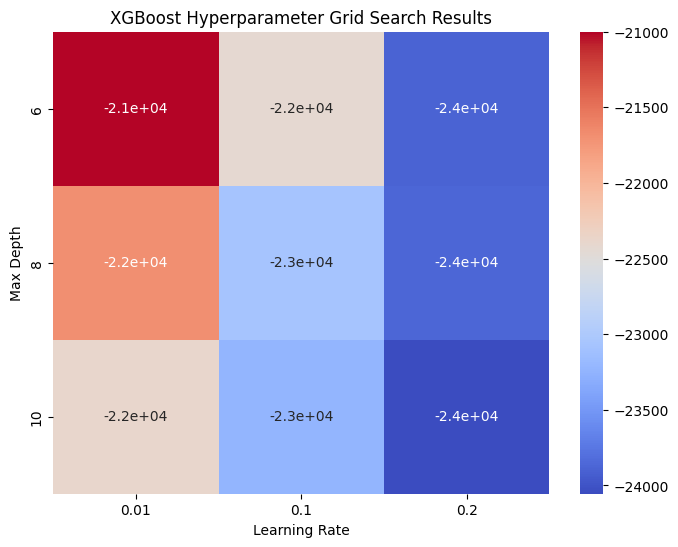

In [32]:
import matplotlib.pyplot as plt

# Extract the results of Grid Search for XGBoost
# This creates a DataFrame from the grid search results
results_xgb = pd.DataFrame(grid_search_xgb.cv_results_)

# Reshape the results to create a pivot table with 'max_depth' as rows and 'learning_rate' as columns
# The values in the table represent the mean test score for each combination of max_depth and learning_rate
results_xgb = results_xgb.pivot_table(index='param_max_depth', columns='param_learning_rate', values='mean_test_score')

# Plot a heatmap to visualize the grid search results
# The heatmap will show how the mean test score varies across the different hyperparameter values
plt.figure(figsize=(8, 6))  # Set the figure size for the plot
plt.title("XGBoost Hyperparameter Grid Search Results")  # Set the title of the plot
sns.heatmap(results_xgb, annot=True, cmap='coolwarm')  # Plot the heatmap with annotations and color map
plt.xlabel('Learning Rate')  # Label for the x-axis
plt.ylabel('Max Depth')  # Label for the y-axis
plt.show()  # Display the plot
